In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from random import randint


from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

NCONTAINERS = 20000

In [2]:
def gera_containers_transito(n=NCONTAINERS):
    tempos =  np.random.normal(20, 5, NCONTAINERS)
    containers_transito = [Container('{:05d}'.format(numero), tempos[i]) 
                       for i, numero in enumerate(range(1, NCONTAINERS))] 
    return containers_transito

In [3]:
def gera_agendamento_containers(containers_transito, dias=30, qtdedia=200, erro=2):
    agendamentos = defaultdict(list)
    container_por_tempo = defaultdict(list)
    for c in containers_transito:
        container_por_tempo[int(c.time_to_leave)].append(c)
    for dia in range(1, dias):
        tempos_dia = np.random.normal(0, erro, qtdedia) + dia
        for t in tempos_dia:
            containers = container_por_tempo[int(t)]
            if containers:
                container_transito = containers.pop(randint(0, len(containers) - 1))
                if container_transito:
                    agendamentos[dia].append(container_transito)
    return agendamentos

In [4]:
def plot_patio(patio, nome_pilha='0001'):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    passo_x = 1 / len(COLUNAS)
    passo_y = .8 / len(ALTURAS)
    boxes = []
    for c, coluna in enumerate(patio._pilhas[nome_pilha]._pilha.items()):
        rect = Rectangle((passo_x * c, 0), passo_x*.9, .8)
        boxes.append(rect)
        posicao_x = passo_x * c
        ax.text(passo_x * c + (passo_x /3), .9, coluna[0], fontsize=20)
        for altura, container in coluna[1].items():
            if container is not None:
                texto_container = f'{container._numero}-{container.time_to_leave:0.2f}'
                posicao_y = passo_y * (int(altura) - 1) + .01
                ax.text(posicao_x + .02, posicao_y + .02,
                        texto_container, fontsize=14)
                rect = Rectangle((posicao_x + .01,
                                  posicao_y),
                                 passo_x * .7, .12)

                boxes.append(rect)

    pc = PatchCollection(boxes, edgecolor='r')
    ax.add_collection(pc)

[00001, 00002, 00003, 00004, 00005, 00006, 00007, 00008, 00009, 00010]


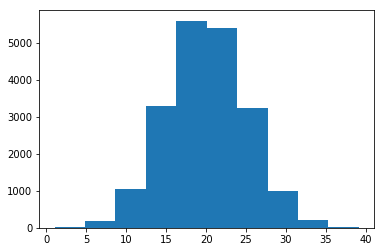

In [5]:
containers_transito = gera_containers_transito()
plt.hist([c.time_to_leave for c in containers_transito])
print(containers_transito[:10])

4327


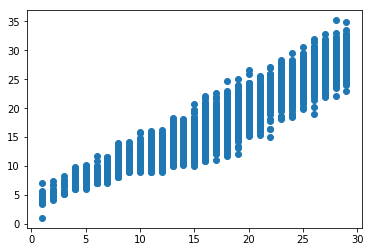

In [6]:
containers_agendados = gera_agendamento_containers(containers_transito)

x = []
y = []
for dia, containers in containers_agendados.items():
    for c in containers:
        x.append(dia)
        y.append(c.time_to_leave)
    
plt.scatter(x, y)
print(len(x))

In [7]:
patio = Patio()
gerente = GerenteRemocao(patio)
gerente.add_container(containers_transito[0])

'A1'

In [8]:
print(patio._pilhas)

OrderedDict([('0001', <busca.classes.patio.Pilha object at 0x7f7e87937f98>)])


In [9]:
for coluna in patio._pilhas['0001']._pilha.items():
    print(coluna)

('A', OrderedDict([('1', 00001), ('2', None), ('3', None), ('4', None), ('5', None)]))
('B', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('C', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('D', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('E', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('F', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))


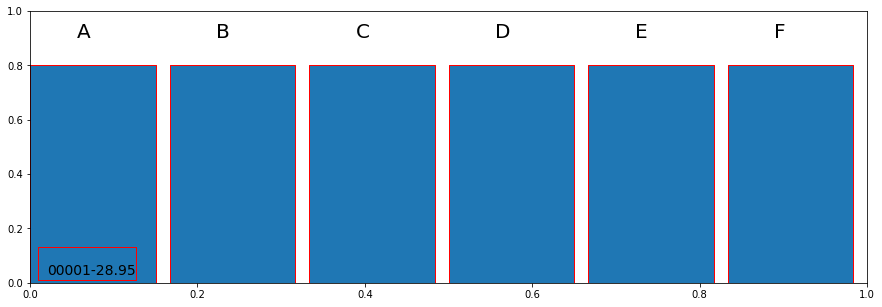

In [10]:
plot_patio(patio, '0001')

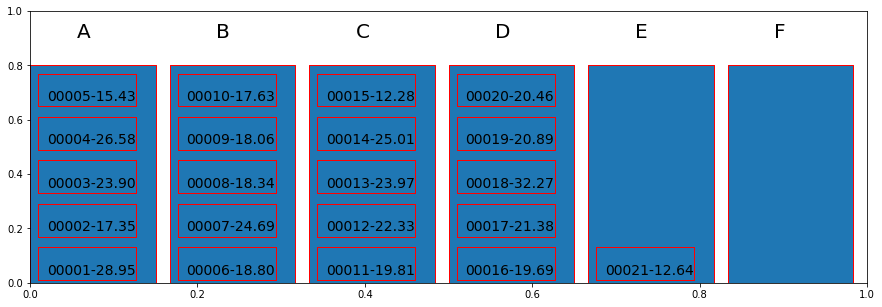

In [11]:
patio = Patio()
gerente = GerenteRemocao(patio)
for i in range(21):
    gerente.add_container(containers_transito[i])
plot_patio(patio)

4350


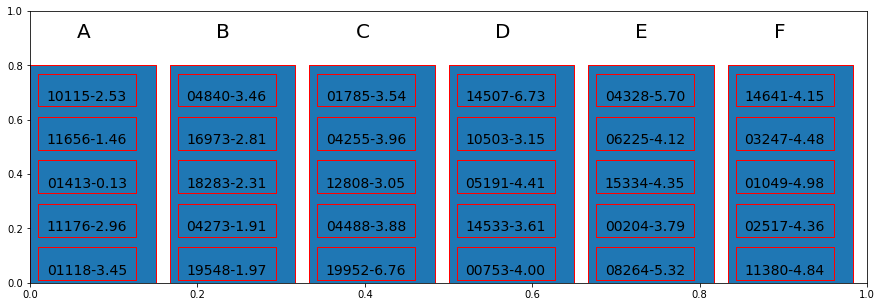

In [12]:
containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
qtde = 0
for dia, containers in containers_agendados.items():
    for c in containers:
        qtde += 1
        containers_transito.pop(containers_transito.index(c))
        pilha = gerente.pilha_mesmo_tempo(c)
        nome_pilha = None
        if pilha:
            nome_pilha = pilha._nome
        gerente.add_container(c, nome_pilha)
print(qtde)
plot_patio(patio)

In [13]:
gerente._patio._pilhas

OrderedDict([('0001', <busca.classes.patio.Pilha at 0x7f7e878da9e8>),
             ('0002', <busca.classes.patio.Pilha at 0x7f7e8a1b1da0>),
             ('0003', <busca.classes.patio.Pilha at 0x7f7e8a1a2860>),
             ('0004', <busca.classes.patio.Pilha at 0x7f7e8a1a2c50>),
             ('0005', <busca.classes.patio.Pilha at 0x7f7ebc07a358>),
             ('0006', <busca.classes.patio.Pilha at 0x7f7e89a24470>),
             ('0007', <busca.classes.patio.Pilha at 0x7f7e89a24c50>),
             ('0008', <busca.classes.patio.Pilha at 0x7f7e87446f60>),
             ('0009', <busca.classes.patio.Pilha at 0x7f7e878ba6a0>),
             ('0010', <busca.classes.patio.Pilha at 0x7f7e878bada0>),
             ('0011', <busca.classes.patio.Pilha at 0x7f7e876f74e0>),
             ('0012', <busca.classes.patio.Pilha at 0x7f7e876f7be0>),
             ('0013', <busca.classes.patio.Pilha at 0x7f7e89a1d320>),
             ('0014', <busca.classes.patio.Pilha at 0x7f7e89a1da20>),
             ('0015'

In [14]:
qtde / 30

145.0

In [15]:
for pilha in gerente._patio._pilhas.values():
    print(pilha.time_mean())

3.7379786267479007
6.004188369083591
6.459261685360967
7.709865186851391
7.594551044897817
8.326332028637887
8.537682346649133
8.738167742561892
9.221780774308082
9.480549154533533
9.74671844915726
9.342797978778918
10.247658171929498
10.10546707023547
10.534133776693317
10.902923085336615
11.012379731890375
11.221505919925319
11.460028266528195
10.89646870127691
11.548903379119356
11.257992551553693
11.27554181851916
11.667261095363658
12.198943771404657
12.032895326173717
12.822442388329007
12.263518416260107
12.07002859227869
12.5254092095579
12.17963750163617
12.321764065087793
13.037520245238722
13.387530241585116
13.085091019796883
12.504775847561508
13.214266301022832
12.78800614907279
13.661107073537238
14.140639800839551
14.687313293719049
14.151959261840164
13.649602397248994
13.534926582999981
13.513420397923209
15.284186671705292
14.5025077927268
15.588571105341735
15.285026143013067
14.888408860500858
14.946707866675533
15.731170744839597
16.542725980518853
15.932853694135

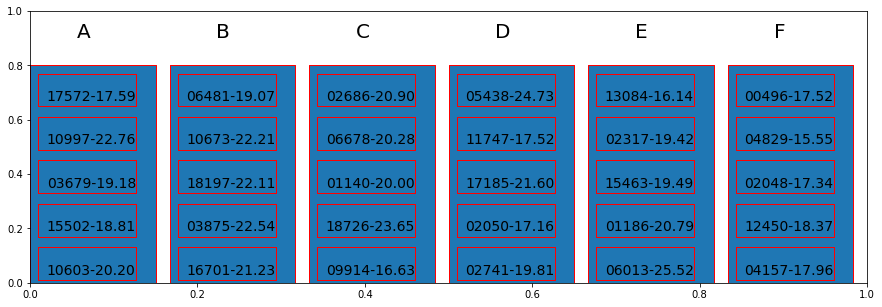

In [16]:
plot_patio(patio, '0082')

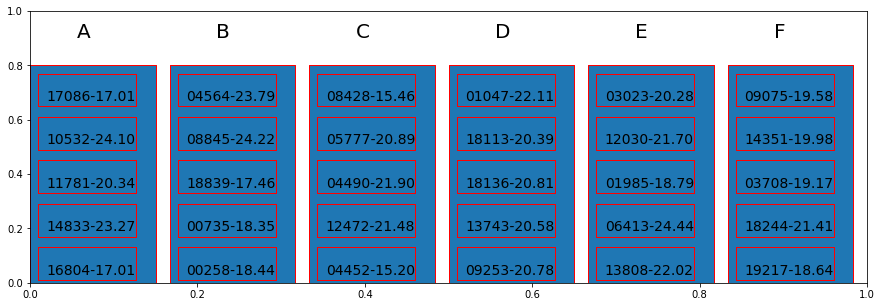

In [17]:
plot_patio(patio, '0083')